In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install optuna
import optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 308 kB 31.1 MB/s 
     |████████████████████████████████| 209 kB 64.1 MB/s 
     |████████████████████████████████| 81 kB 11.0 MB/s 
     |████████████████████████████████| 78 kB 9.2 MB/s 
     |████████████████████████████████| 49 kB 7.0 MB/s 
     |████████████████████████████████| 112 kB 77.2 MB/s 
     |████████████████████████████████| 147 kB 72.5 MB/s 
  Created wheel for pyperclip: filename=pyperclip-1.8.2-py3-none-any.whl size=11137 sha256=2fa46d01ae6fd638aab8805721c94e90f06cdae51e3c47ef65e82cf4cf4bac95
  Stored in directory: /root/.cache/pip/wheels/9f/18/84/8f69f8b08169c7bae2dde6bd7daf0c19fca8c8e500ee620a28
Successfully built pyperclip


In [3]:
cd /content/drive/MyDrive/ygrene/수방이작업실/

/content/drive/.shortcut-targets-by-id/1PK1OaPryLfu2eB3iega5z40yHx_idzuf/ygrene/수방이작업실


In [4]:
import numpy as np 
import pandas as pd
from time import time 
import pprint

import warnings
warnings.filterwarnings('ignore')


import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt

In [5]:
data = pd.read_csv('./wind_baseline_KNN.csv')
data_x = data[data['datetime'] < '2022-05-01']
data_y = data_x['target']
data_x = data_x.iloc[:,2:]

test_x = data[(data['datetime'] >= '2022-05-01') & (data['datetime'] < '2022-07-01')]
test_x.drop(['datetime','target'], axis=1, inplace=True)

In [6]:
from sklearn.model_selection import train_test_split
train_x, val_x, train_y, val_y = train_test_split(data_x, data_y, test_size=0.1, random_state=1234)

In [7]:
from sklearn.preprocessing import  MinMaxScaler

mm_scaler = MinMaxScaler()
mm_scaler.fit(train_x)
train_x_scaled = mm_scaler.transform(train_x)
val_x_scaled = mm_scaler.transform(val_x)
test_x_scaled = mm_scaler.transform(test_x)

train_y = np.array(train_y)
val_y = np.array(val_y)

In [8]:
def NMAE(true, pred, nominal=16000):
    absolute_error = np.abs(true - pred)
    absolute_error /= nominal
    target_idx = np.where(true >= nominal*0.1)
    return 100 * np.array([absolute_error[i] for i in target_idx]).mean()

In [ ]:
# from sklearn.metrics import mean_squared_error
# from sklearn.model_selection import train_test_split
# from xgboost import XGBRegressor
# def objective(trial,data=train_x_scaled,target=train_y):
    
#     train_x, test_x, train_y, test_y = train_test_split(data, target, test_size=0.1,random_state=1234)
#     param = {
#   # this parameter means using the GPU when training our model to speedup the training process
#         'lambda': trial.suggest_loguniform('lambda', 1e-3, 10.0),
#         'alpha': trial.suggest_loguniform('alpha', 1e-3, 10.0),
#         'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9, 1.0]),
#         'subsample': trial.suggest_categorical('subsample', [0.4,0.5,0.6,0.7,0.8,1.0]),
#         'learning_rate': trial.suggest_categorical('learning_rate', [0.008,0.01,0.012,0.014,0.016,0.018, 0.02]),
#         'n_estimators': 10000,
#         'max_depth': trial.suggest_categorical('max_depth', [3,4,5,6,7,8,9,10,11,12,13,14,15]),
#         'random_state': trial.suggest_categorical('random_state', [1234]),
#         'min_child_weight': trial.suggest_int('min_child_weight', 100, 1000),

#         'objective':'reg:squarederror',
#         'tree_method':'gpu_hist',
#     }
#     model = XGBRegressor(**param)  
    
#     model.fit(train_x,train_y,eval_set=[(test_x,test_y)],early_stopping_rounds=10,verbose=False)
    
#     preds = model.predict(test_x)
    
#     nmae = NMAE(test_y, preds, 16000)
    
#     return nmae

In [ ]:
# study = optuna.create_study(direction='minimize')
# study.optimize(objective, n_trials=70)
# print('Number of finished trials:', len(study.trials))
# print('Best trial:', study.best_trial.params)

[I 2022-08-21 23:30:35,587] A new study created in memory with name: no-name-6ffa4564-5a7b-472b-9d7c-779de80ba473
[I 2022-08-21 23:30:49,427] Trial 0 finished with value: 9.607694664828953 and parameters: {'lambda': 0.02255769249199418, 'alpha': 0.03190607801688262, 'colsample_bytree': 0.9, 'subsample': 0.7, 'learning_rate': 0.02, 'max_depth': 7, 'random_state': 1234, 'min_child_weight': 781}. Best is trial 0 with value: 9.607694664828953.
[I 2022-08-21 23:31:05,434] Trial 1 finished with value: 9.72405016863354 and parameters: {'lambda': 0.00755673757466063, 'alpha': 0.026205824624856017, 'colsample_bytree': 0.3, 'subsample': 0.8, 'learning_rate': 0.014, 'max_depth': 9, 'random_state': 1234, 'min_child_weight': 749}. Best is trial 0 with value: 9.607694664828953.
[I 2022-08-21 23:31:37,878] Trial 2 finished with value: 8.903303122349119 and parameters: {'lambda': 2.9552477999520437, 'alpha': 0.007025128615702145, 'colsample_bytree': 0.9, 'subsample': 1.0, 'learning_rate': 0.012, 'max_

Number of finished trials: 70
Best trial: {'lambda': 0.9636539443606752, 'alpha': 0.76227778805925, 'colsample_bytree': 0.5, 'subsample': 0.8, 'learning_rate': 0.014, 'max_depth': 15, 'random_state': 1234, 'min_child_weight': 100}


In [ ]:
params = study.best_params
params['random_state'] = 1234
params['n_estimators'] = 2000
params['metrics'] = 'rmse'

In [ ]:
params

{'lambda': 0.9636539443606752,
 'alpha': 0.76227778805925,
 'colsample_bytree': 0.5,
 'subsample': 0.8,
 'learning_rate': 0.014,
 'max_depth': 15,
 'random_state': 1234,
 'min_child_weight': 100,
 'n_estimators': 2000,
 'metrics': 'rmse'}

In [12]:
from optuna.samplers import TPESampler
import lightgbm as lgb

sampler = TPESampler(seed=10)

def objective(trial):
    dtrain = lgb.Dataset(train_x_scaled, label=train_y)
    dtest = lgb.Dataset(val_x_scaled, label=val_y)

    param = {
        'objective': 'regression', # 회귀
        'verbose': -1,
        'metric': 'rmse', 
        'max_depth': trial.suggest_int('max_depth',3, 15),
        'learning_rate': trial.suggest_loguniform("learning_rate", 1e-8, 1e-2),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-3, 10.0),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-3, 10.0),
        'n_estimators': trial.suggest_int('n_estimators', 100, 3000),
        'min_child_samples': trial.suggest_int('min_child_samples', 100, 500),
        'colsample_bytree': trial.suggest_categorical('colsample_bytree', [0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0]),
        'num_leaves' : trial.suggest_int('num_leaves', 1, 1000),
        'subsample': trial.suggest_loguniform('subsample', 0.4, 1),
    }

    model = lgb.LGBMRegressor(**param)
    lgb_model = model.fit(train_x_scaled, train_y, eval_set=[(val_x_scaled, val_y)], verbose=0, early_stopping_rounds=25)
    nmae = NMAE(val_y, lgb_model.predict(val_x_scaled), 16000)
    return nmae
        
study_lgb = optuna.create_study(direction='minimize', sampler=sampler)
study_lgb.optimize(objective, n_trials=50)

[I 2022-08-22 06:36:28,341] A new study created in memory with name: no-name-988fabe1-7275-4e21-b32a-0f2408c3edf6
[I 2022-08-22 06:36:33,914] Trial 0 finished with value: 12.54271080870456 and parameters: {'max_depth': 13, 'learning_rate': 1.3320229150659043e-08, 'reg_alpha': 0.34244666391252937, 'reg_lambda': 0.989043812103006, 'n_estimators': 1546, 'min_child_samples': 190, 'colsample_bytree': 0.8, 'num_leaves': 813, 'subsample': 0.7011462565718398}. Best is trial 0 with value: 12.54271080870456.
[I 2022-08-22 06:36:42,734] Trial 1 finished with value: 12.540108939164012 and parameters: {'max_depth': 12, 'learning_rate': 5.639705277794729e-07, 'reg_alpha': 4.689175530591106, 'reg_lambda': 0.7216109813316297, 'n_estimators': 1673, 'min_child_samples': 157, 'colsample_bytree': 0.4, 'num_leaves': 806, 'subsample': 0.6451255817003931}. Best is trial 1 with value: 12.540108939164012.
[I 2022-08-22 06:36:43,549] Trial 2 finished with value: 12.54165146541873 and parameters: {'max_depth': 1

In [13]:
trial = study_lgb.best_trial
trial_params = trial.params
print('Best Trial: score {},\nparams {}'.format(trial.value, trial_params))

Best Trial: score 9.772062943106405,
params {'max_depth': 7, 'learning_rate': 0.008760492503745693, 'reg_alpha': 0.5613079727086914, 'reg_lambda': 0.5469209137093743, 'n_estimators': 2815, 'min_child_samples': 445, 'colsample_bytree': 0.8, 'num_leaves': 730, 'subsample': 0.9970953576797487}


In [15]:
lgbm_lgb = lgb.LGBMRegressor(**trial_params)

lgbm_lgb.fit(train_x_scaled, train_y)

LGBMRegressor(colsample_bytree=0.8, learning_rate=0.008760492503745693,
              max_depth=7, min_child_samples=445, n_estimators=2815,
              num_leaves=730, reg_alpha=0.5613079727086914,
              reg_lambda=0.5469209137093743, subsample=0.9970953576797487)

In [16]:
lgbm_train_pred = lgbm_lgb.predict(train_x_scaled)
print('train 결과:',NMAE(train_y, lgbm_train_pred, 16000))
lgbm_val_pred = lgbm_lgb.predict(val_x_scaled)
print('val 결과:',NMAE(val_y, lgbm_val_pred, 16000))

train 결과: 8.653576709218484
val 결과: 9.772062943106405


In [ ]:
xgb_reg = XGBRegressor(**params)

# evals=[(val_x_scaled, val_y)]

# xgb_reg.fit(train_x_scaled, train_y, early_stopping_rounds=3, 
#                  eval_metric='rmse', eval_set=evals, verbose=False)

xgb_reg.fit(train_x_scaled, train_y)

[00:04:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=0.76227778805925, colsample_bytree=0.5,
             lambda=0.9636539443606752, learning_rate=0.014, max_depth=15,
             metrics='rmse', min_child_weight=100, n_estimators=2000,
             random_state=1234, subsample=0.8)

In [ ]:
xgb_train_pred = xgb_reg.predict(train_x_scaled)
print('train 결과:',NMAE(train_y, xgb_train_pred, 16000))
xgb_val_pred = xgb_reg.predict(val_x_scaled)
print('val 결과:',NMAE(val_y, xgb_val_pred, 16000))

train 결과: 5.473371033539715
val 결과: 8.412784509932782


In [ ]:
# early stopping 적용
xgb_train_pred = xgb_reg.predict(train_x_scaled)
print('train 결과:',NMAE(train_y, xgb_train_pred, 16000))
xgb_val_pred = xgb_reg.predict(val_x_scaled)
print('val 결과:',NMAE(val_y, xgb_val_pred, 16000))

train 결과: 6.693687174172015
val 결과: 8.828557292547071


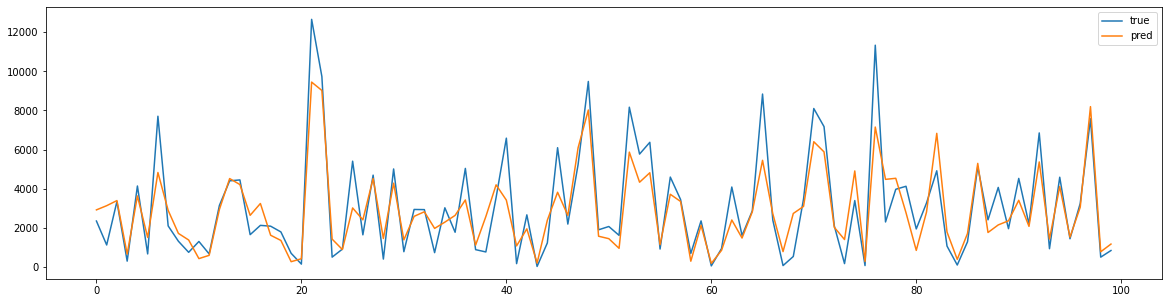

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(train_y[:100], label='true')
plt.plot(xgb_train_pred[:100], label='pred')
plt.legend()
plt.show()

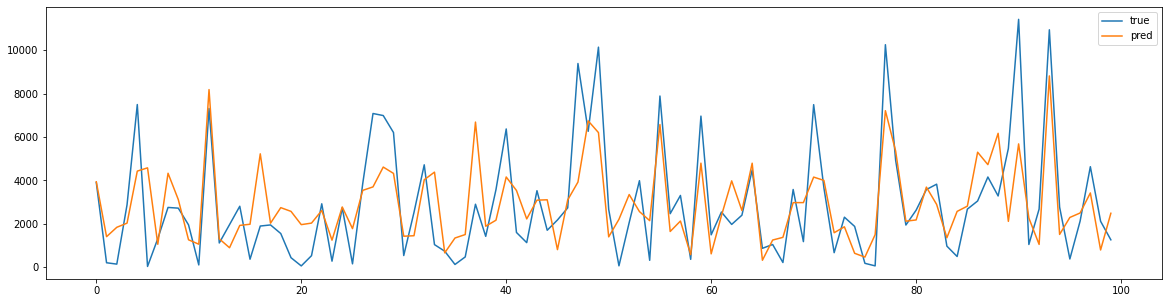

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(val_y[:100], label='true')
plt.plot(xgb_val_pred[:100], label='pred')
plt.legend()
plt.show()